In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


<h1>first project</h1>

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y.shape

(70000,)

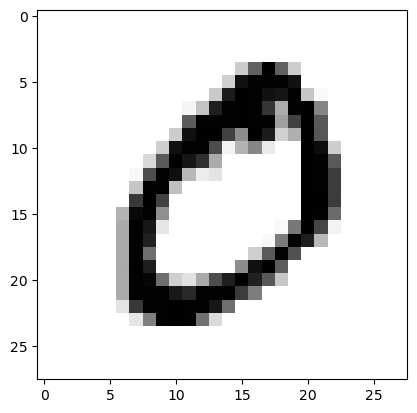

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
some_digit = X.to_numpy()[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")#رنگ  سیاه سفید میزاره , به صورت مربعی میشه
plt.axis("on")#اعداد روی نمودار رو نمایش میده با ان یا نمیده با اف
plt.show()

In [12]:
y[60000]

'7'

In [13]:
y = y.astype(np.uint8)

In [14]:
X_train, X_test, y_train, y_test =X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [28]:
#from sklearn.linear_model import kNeighborsClassifier   #sKlearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
sgd_clf = KNeighborsClassifier(n_neighbors=15)  #5  #10  #15  #20
sgd_clf.fit(X_train, y_train_5)

#sgd_clf = KNeighborsClassifier()
#sgd_clf.fit(X_train, y_train_5)


KNeighborsClassifier(n_neighbors=15)

In [29]:
sgd_clf.predict([some_digit])

c:\Users\10\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([False])

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#array([0.9941, 0.993 , 0.9931])
#array([0.993  , 0.9916 , 0.99225])
#array([0.9925 , 0.99105, 0.99235])
#array([0.99165, 0.98965, 0.9915 ])

array([0.9925 , 0.99105, 0.99235])

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix # type: ignore
confusion_matrix(y_train_5, y_train_pred)

array([[54420,   159],
       [  323,  5098]], dtype=int64)

In [33]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)  
#0.970  #0.974  #0.969  #0.969


0.9697546128970896

In [34]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)
#0.956  #0.938  #0.940  #0.940

0.9404168972514296

In [35]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
#0.963  #0.956  #0.954  #0.948

0.9548604607604421

Multiclass Classification

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

c:\Users\10\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [37]:
forest_clf.predict([some_digit])

c:\Users\10\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.928  , 0.9306 , 0.93325])